# Home Assignment No. 1: Part 1 (Practice)
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places incide notebook **CELLS**.

* In some problems you are asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

Before the start, read several additional recommendations.
* Probably you lauch `jupyter notebook` or `ipython notebook` from linux console. Try `jupyter lab` instead - it is a more convenient environment to work with notebooks.
* Probably the PC on which you are going to evaluate models has limited CPU/RAM Memory. In this case, we recommend to monitor the CPU and Memory Usage. To do this, you can execute `htop` (for CPU/RAM) or `free -s 0.2` (for RAM) in terminal.
* Probably tou have multiple Cores (CPU) on your PC. Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, lets import the essential (for this assignment) libraries.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import make_moons, make_circles

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### BEGIN Your imports
### END Your imports

## Task 1. Numpy Problem 1 (1 point)

Write a function, which takes a matrix `arr` and centers each of its rows
by the mean within that row. Check [this](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)
out for documentation.

In [3]:
def center(arr):
    """Center each row of a matrix by the mean value in that row.

    Parameters
    ----------
    arr : array, shape = (n_rows, n_cols)
        The matrix, the rows of which to center.

    Returns
    ----------
    out : array, shape = (n_rows, n_cols)
        The final row-centered matrix.
    """
    assert arr.ndim == 2
    n_rows, n_cols = arr.shape

    ### BEGIN Solution

    out = arr - arr.mean(axis = 1).reshape((n_rows, 1))
    
    ### END Solution

    return out

<br/>

## Task 2. Numpy Problem 2 (1 point)

Implement the following fancy function:
\begin{equation}
    f(x) = \sigma\bigl(
                \max\{x + 5, 0\} + \max\{5 - x, 0\}
                + \max\{\min\{\cos(2 x \pi), \tfrac12\}, -\tfrac14\}
            \bigr)
         \,,
\end{equation}
where $\sigma(x) = (1+e^{-x})^{-1}$ is the sigmoid function.

In [18]:
def fancy_function(x):
    """Compute some fancy function.
    
    Parameters
    ----------
    x : array, 1 dimendional, shape=(n_samples,)
        The array argument values.

    Returns
    -------
    y : array, 1 dimendional, shape=(n_samples,)
        The values of the fancy function.
    """
    ### BEGIN Solution
    def sigmoid_array(x):                                        
        return 1 / (1 + np.exp(-x))
    out = sigmoid_array(np.maximum(x+5, 0) + np.maximum(5-x, 0) + np.maximum(np.minimum(np.cos(2*np.pi*x), 1/2), -1/4))
    ### END Solution
    
    return out

Plot the function

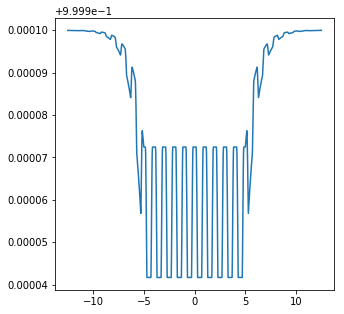

In [20]:
x = np.linspace(-12.5, 12.5, num=1001)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x, fancy_function(x))
plt.show()

## Task 3. Matplotlib (2 points)

Plot the level sets of the $l^p$ norm
\begin{equation}
    \|z\|_p = \biggl(\sum_i \lvert x_i\rvert^p\biggr)^\tfrac1{p}
        \,.
\end{equation}
and make the contour of the unit ball in $l^p$ norm stand out. Draw plots
for $p \in \{0, \tfrac1{25}, \tfrac12, 1, 1.5, 2, 7, \infty\}$.

Study plotting examples on [this](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf) and [this](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) pages (**especially the last one**) and have a look at these functions: *np.meshgrid*, *np.linspace* in numpy's documentation. We suggest to use `np.linalg.norm`.

Try to produce a plot that **looks like the one below**:

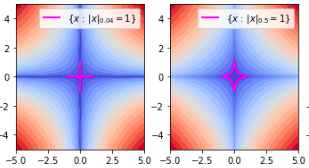

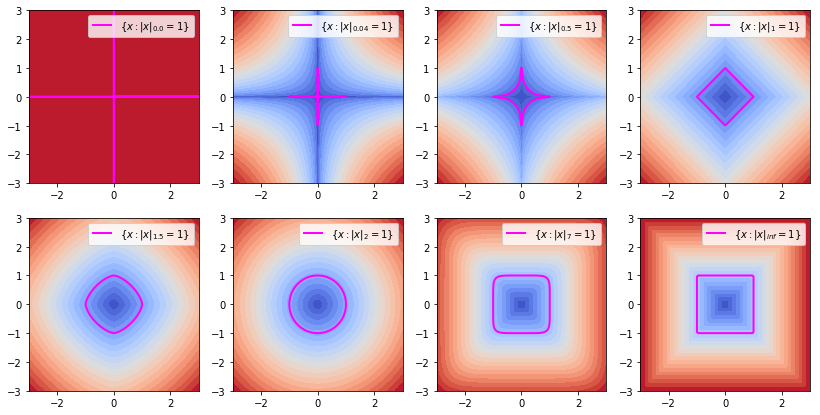

In [93]:
p_values = [0., 0.04, 0.5, 1, 1.5, 2, 7, np.inf]
xx, yy = np.meshgrid(np.linspace(-3, 3, num=101),
                     np.linspace(-3, 3, num=101))

fig, axes = plt.subplots(ncols=(len(p_values) + 1)// 2,
                         nrows=2, figsize=(14, 7))

vectors = np.concatenate([np.expand_dims(xx, axis=2), np.expand_dims(yy, axis=2)], axis=2)
for p, ax in zip(p_values, axes.flat):
    ### BEGIN Solution
    values = np.linalg.norm(vectors, axis = 2, ord = p)

    ax.contourf(xx, yy, values, levels=np.linspace(values.min(), values.max(), 24), cmap='coolwarm')
    ctr = ax.contour(xx, yy, values, levels=[1], linewidths=2, cmap='spring')
    ax.legend([ctr.collections[0]], [r"{$x: |x|_{%r} = 1$}" % p], loc = 'upper right')
    ### END Solution

plt.show()

## Task 4. Decision Rules and Feature Engeneering (1+1=2 points)

In this task your goal is to visualize the decision rules of several classifiers applied to artificial $2$-dimensional dataset generated by builtin `sklearn.datasets` method called `make_moons`. In the cell below we generate the dataset.

In [192]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=404)

### Subproblem 4.1. Decision Rule Plotting (1 of 2 points)

The goal of the subproblem is to fit the following classifiers on features `X` to target `y`:
* Decision Tree (single!) with small depth (e.g. $4$);
* Random Forest with small number of trees (e.g. $25$) of low depth;
* Logistic Regreesion;
* Support Vector Machine with RBF kernel;
* Gaussian Naive Bayes;
* k-Nearest Neighbor Classifier with small number of neighbors (e.g. $3$);

For all the fitted classifiers you have to plot the decision regions (the example is shown below the cell). Each plot must have **Title** which contains name of the classifier and its accuracy on the data.

You can write the plotting code on your own, but we highly recommend just to use `mlxtend` library (`pip install mlxtend` in linux terminal), which has awesome one-line decision rule plotting function (you are to [google](http://google.com) it).

/home/dmitriy/MyEnv/other/skoltech/ml/env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/MyEnv/other/skoltech/ml/env/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


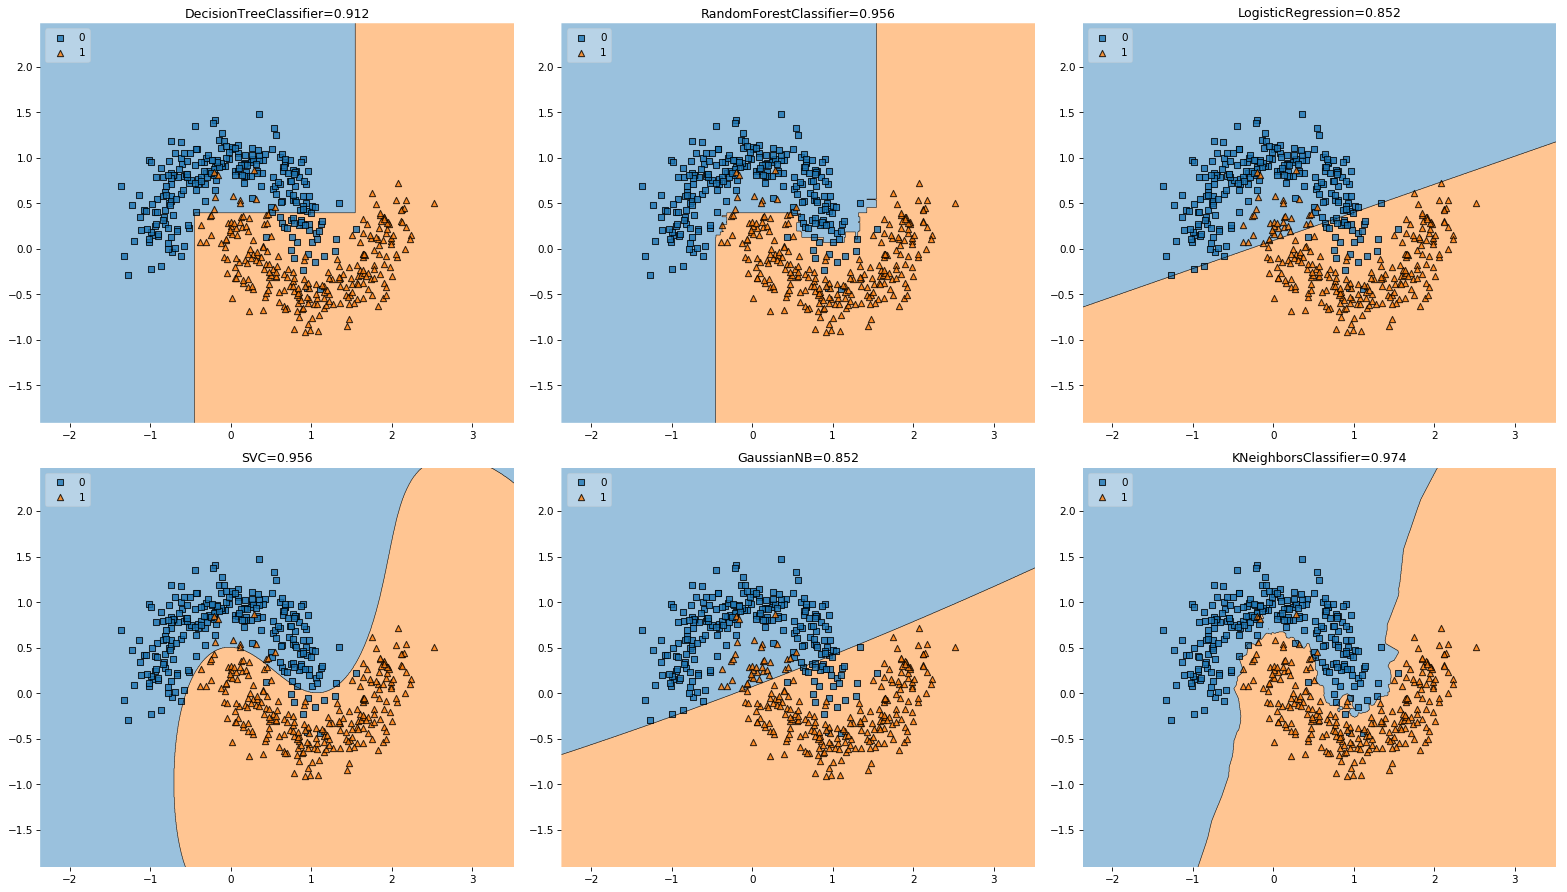

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


clfs = [
    DecisionTreeClassifier(max_depth = 4, random_state=666), 
    RandomForestClassifier(n_estimators=25, max_depth = 4, random_state=666),
    LogisticRegression(random_state=666), 
    SVC(), # default rbf
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=3)
]

fig, axes = plt.subplots(
    ncols=(len(clfs) + 1)// 2,
    nrows=2, figsize=(6 * ((len(clfs) + 1)) // 2, 12),
    dpi=75
)

for clf, ax in zip(clfs, axes.flat):
    clf.fit(X, y)
    accuracy = accuracy_score(y, clf.predict(X))
    ax.set_title(clf.__str__().split('(',1)[0] + "={val}".format(val=accuracy))
    plot_decision_regions(X=X, y=y, clf=clf, legend=2, ax=ax) # Plot decision regions
    
fig.tight_layout()

### Subproblem 4.2. Pipeline: Fitting to Data by Feature Engeneering (1 of 2 points)
In previous task 1.1 several classifiers obviously failed fitting to data. This happend because the decision rule of the classifier has a restricted form (e.g. linear for linear models), while the data is more complicated.

One may try to change the parameters of the classifier (e.g. increase the number of trees in Forest) in order to improve accuracy, but some models (especially linear) do not have parameters that can change the form of the decision rule.

In this case, the **feature engeneering** helps: one may try to compute new (e.g. non-linear) features based on the existing pool and fit the classifier in the new features. This may help low-complex claffifiers to fit to hard data dependencies.

Your task it to
* Choose **two classifiers** from the following: Decision Tree, Random Forest, Naive Bayes, Logistic Regression;
* By generating of additional features (e.g. polynomial) make them achieve accuracy $>0.95$.
* For each classifier, write 2-3 sentences why did you decide to choose these features.
* Plot their decision rules in the original feature space.

It is your choice how to generate features. You may create hand-crafted featues and add them manualy. Nevertheless, we **highly suggest** to get used to and apply the following builtin `sklearn` methods:
* `PolynomialFeatures`, `GaussianRandomProjection` among others - for feature generation
* `StandartScaler`, `MinMaxScaler` among others - for feature scaling
* `Pipeline` - for combining several operations in a row (e.g. feature creation & prediction)

/home/dmitriy/MyEnv/other/skoltech/ml/env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


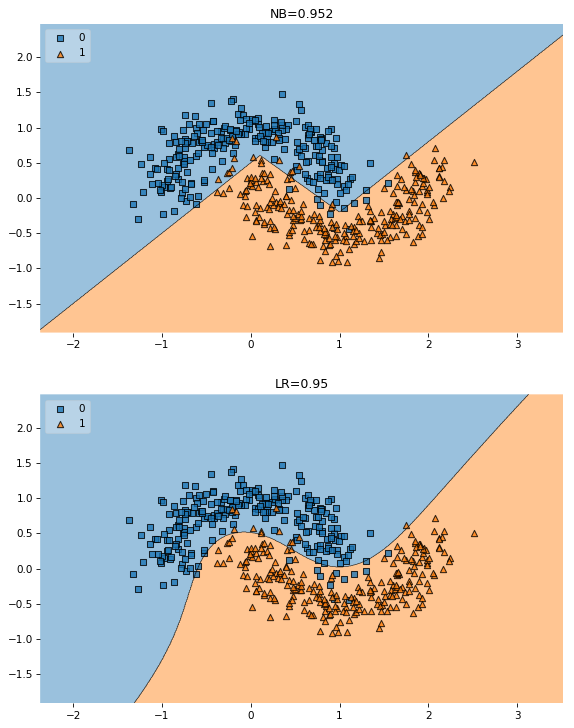

In [275]:
### BEGIN Solution
from sklearn.preprocessing import PolynomialFeatures, Normalizer, PowerTransformer, KBinsDiscretizer, FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline


# I just saw that this dataset can be well divided by the combination of lines, 
# so I just picked up some of them. It seems natural for NB.
nb = make_pipeline(FunctionTransformer(lambda x: np.concatenate([
                                                                 (x[:,1] > -0.9*x[:,0]+0.7)[:,None],
                                                                 (x[:,1] > x[:,0]-1.2)[:,None],
                                                                 (x[:,1] > x[:,0]+0.5)[:,None],
                                                                ], axis=1).astype(float), validate=True),
                               GaussianNB())

# Again it's easy to see that this data can be divided by a smooth curve.
# But of course x+y will never create any curve. So, let's use nonlinear x^2 y^2 xy x^3, y^3 etc. 
lr = make_pipeline(PolynomialFeatures(3), 
                         LogisticRegression(random_state=0))

clfs = [nb, lr]

fig, axes = plt.subplots(
    ncols=(len(clfs) + 1)// 2,
    nrows=2, figsize=(6 * ((len(clfs) + 1)) // 2, 12),
    dpi=75
)
lbls = ['NB', 'LR']
for clf, ax, lbl in zip(clfs, axes.flat, lbls):
    clf.fit(X, y)
    accuracy = accuracy_score(y, clf.predict(X))
    ax.set_title(lbl + "={val}".format(val=accuracy))
    plot_decision_regions(X=X, y=y, clf=clf, legend=2, ax=ax) # Plot decision regions
### END Solution

## Task 5. Model Selection (1+1 points)

You are to test Random Forests and Support Vector Machines on a trivial [Tic Tac Toe Endgame Dataset](https://datahub.io/machine-learning/tic-tac-toe-endgame). Let's load it.

In [297]:
data = pd.read_csv('data/tic-tac-toe.csv')
X, y = data.drop('class', axis=1), data['class'].astype(int)
data.sample(3)

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
600,b,b,x,o,b,x,o,b,x,True
238,x,b,x,b,o,x,o,o,x,True
0,x,x,x,x,o,o,x,o,o,True


The dataset consists of several possible endgame positions of the Tic-Tac-Toe game. The target variable is the victory of `x` player over `o` player (victory or defeat/draw). Since the features are categorical, we simply transform them to real-valued $-1$ for `o`, $1$ for `x` and $0$ for emply cell `b`.

In [298]:
X = X.applymap(lambda v: 1 if v == 'x' else -1 if v == 'o' else 0)
X.sample(4).sort_index()

,TL,TM,TR,ML,MM,MR,BL,BM,BR
146,1,-1,-1,1,1,1,-1,-1,1
319,-1,1,-1,1,1,1,-1,1,-1
551,0,-1,1,0,1,1,-1,-1,1
842,-1,-1,-1,0,1,0,1,0,1


We are going to test how machine learning algorithms can classify the final game positions into the ones when `x` player won and all others. Everybody knows that for this problem there is a simple decision rule: `x` wins if there are three `x`'s in a row/column/diagonal. But can our cool machine learning tools catch this trivial dependence? In this problem the class balance is around $2:1$ so we still use accuracy metric.

Intuitively, this rule is logical, i.e. one may expect decision-tree-based algorithm to be the most appropriate for this case. But is that true? In the code below we compare huge Random forest with simple Logistic Regression and SVM with default parameters.

In [299]:
rf = RandomForestClassifier(n_estimators=400, max_depth=10)
svm = SVC(gamma='auto')
lr = LogisticRegression(solver='lbfgs')
clfs = (rf, svm, lr)

for clf in clfs:
    score = cross_val_score(clf, X, y, cv=5).mean()
    name = clf.__class__.__name__
    print('{name} scored {score}'.format(name=name, score=round(score, 3)))

RandomForestClassifier scored 0.891
SVC scored 0.941
LogisticRegression scored 0.983


We **counterintuitively** see that RandomForest is outperformed by SVM. Moreover, the simplest Logistic regression significantly outperforms everything. Let's improve Random Forest and SVM in order to be able to compete with Logistic model.

### Subproblem 5.1. Model selection for SVM (1 of 2 points)
Perform **Grid Search** for optimal hyperparameter for SVM model in order to achieve 5-fold validation score on the data not lower than $0.98$. You can code the Grid Search Manually, but we highly encourage yo use builtin `GridSearchCV` method.

In [281]:
### BEGIN Solution
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

cv = StratifiedKFold (n_splits = 5, shuffle = True, random_state = 42)

params = {
    'C' : [1, 1.5, 2, 2.5,], 
    'kernel' : ['rbf', 'poly', 'linear', 'sigmoid'], 
    'degree' : [1,2,3,4], 
    'gamma' : [1,2,3,4,5,6]
}

grid = GridSearchCV(SVC(), params, scoring = 'accuracy', cv = cv)
grid.fit(X, y)

print("Greatest score {}".format(grid.best_score_))
print("Corresponding params {}".format(grid.best_params_))
### END Solution

Greatest score 1.0
Corresponding params {'C': 1, 'degree': 2, 'kernel': 'poly', 'gamma': 5}


### Subproblem 5.2. Feature engeneering for Random Forest  (1 of 2 points)
Perform **feature engeneering** for Random Forest in order to achieve 5-fold validation score not lower than $0.94$. Write 2-3 sentences to explicitly explain your motivation for provided feature choice.

In [301]:
### BEGIN Solution
from sklearn.pipeline import Pipeline
rf_pipe = Pipeline(
                              [('feat', PolynomialFeatures()),
                              ('model', RandomForestClassifier(random_state=666))]
)

params = {
    'feat__degree': [2,3],
    'feat__interaction_only': [False, True],
    'model__n_estimators': [10,20,30,40,50,75,85,95,100],
    'model__max_depth': [3,4,5,6,7,8,9,10,11,12,13]
}

grid = GridSearchCV(rf_pipe, params, scoring = 'accuracy', cv = cv)
grid.fit(X, y)

print("Greatest score {}".format(grid.best_score_))
print("Corresponding params {}".format(grid.best_params_))

### END Solution

Greatest score 0.9968684759916493
Corresponding params {'model__n_estimators': 85, 'feat__interaction_only': False, 'feat__degree': 3, 'model__max_depth': 10}


During cv model work with only part of information and suffer from 
lack of generalizing ability (with default params). 
Since multiplying features adds some information about interaction within cells. 
E.g. there'll be some combinations which automatically show that player 1 or player 2 has won.

## Task 6. Bagging Ensembles of Regressors (2 points)
In this problem you are to deal with [Concrete Compressive Strength Dataset](https://www.kaggle.com/elikplim/concrete-compressive-strength-data-set). You goal will be to determine the optimal parameters for two Bagging-Based Forest Ensemble **Regressors** and compare the forests. Lets load the data and split it into test and train parts.

In [316]:
data = pd.read_csv('data/concrete.csv').astype(float)
X = data.drop('concrete_compressive_strength', axis=1)
y = data.concrete_compressive_strength

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

data.sample(3).sort_index()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
58,304.0,76.0,0.0,228.0,0.0,932.0,670.0,180.0,50.95
230,213.7,98.1,24.5,181.7,6.9,1065.8,785.4,14.0,30.39
571,228.0,342.1,0.0,185.7,0.0,955.8,674.3,28.0,39.70


Please note that both in Task 4 and Task 5 the whole data was the Train Data. In Task 4 the output score (accuracy) was the **train** score (i.e. the score on the train data of the model fitted on the same data). In task 5 the output score was the **validation score**, i.e. the result of validating the model on the train data.

In this problem, we do a step further and split the whole data into train part (on which we train & validate) and test part (where we compute the final **test** score on the validated model).

In this problem you are to consider the `RandomForestRegressor` and `ExtraTreesRegressor` models for the prediction of concrete compressive strength under **squared loss function** (mean squared error). Recall that Random Forest was discussed in the lectures. [Extremely Randomized Forest](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf) is an other bootstraped forest with simple tree building algorithm. Basically, each split of each tree node is chosen at random both w.r.t. feature and threshold (while in random forest the split minimizes impurity).

You have to do the following steps and answer the following questions:
* For both Forests perform the Grid Search (on the train data) over most important algorithm's parameters (what are they?) to determine the optimal hyperparameters.
* For the optimal parameters output the train, validation score and the score for predicting for the test data.
* Compare the obtained scores. Explain, why the scores differ a lot for train and validation/test.
* Which of the algorithms perform better on the training set? Explain why!

In [330]:
### BEGIN Solution
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

model = RandomForestRegressor()

params = {
    'n_estimators' : [10,20,30,40,50,70,90,100], 
    'max_depth' : [3 ,5, 10, 15] 
}

grid = GridSearchCV(model, params, scoring = make_scorer(lambda a,b: -mean_squared_error(a,b)), cv = cv)
grid.fit(X_train, y_train)

print("Greatest score for RandomForestRegressor {}".format(abs(grid.best_score_)))
print("Corresponding params {}".format(grid.best_params_))

model = RandomForestRegressor(**grid.best_params_)
model.fit(X_train, y_train)

err_train = mean_squared_error(y_train, model.predict(X_train))
err_test = mean_squared_error(y_test, model.predict(X_test))

print("Train score {}".format(err_train))
print("Validation score {}".format(abs(grid.best_score_)))
print("Test score {}".format(err_test))


model = ExtraTreesRegressor()
params = {
    'n_estimators' : [10,20,30,40,50,70,90,100], 
    'max_depth' : [3 ,5, 10, 15]
}

grid = GridSearchCV(model, params, scoring = make_scorer(lambda a,b: -mean_squared_error(a,b)), cv = cv)
grid.fit(X_train, y_train)

print("Greatest score for ExtraTreesRegressor {}".format(abs(grid.best_score_)))
print("Corresponding params {}".format(grid.best_params_))

model = ExtraTreesRegressor(**grid.best_params_)
model.fit(X_train, y_train)

err_train = mean_squared_error(y_train, model.predict(X_train))
err_test = mean_squared_error(y_test, model.predict(X_test))

print("Train score {}".format(err_train))
print("Validation score {}".format(abs(grid.best_score_)))
print("Test score {}".format(err_test))

### END Solution

/home/dmitriy/MyEnv/other/skoltech/ml/env/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Greatest score for RandomForestRegressor 29.09361519106229
Corresponding params {'max_depth': 15, 'n_estimators': 90}
Train score 4.592587736851042
Validation score 29.09361519106229
Test score 25.241820659779545


/home/dmitriy/MyEnv/other/skoltech/ml/env/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Greatest score for ExtraTreesRegressor 25.15499712846753
Corresponding params {'max_depth': 15, 'n_estimators': 90}
Train score 1.364294867934492
Validation score 25.15499712846753
Test score 23.116999070439878


> For both Forests perform the Grid Search (on the train data) over most important algorithm's parameters (what are they?) to determine the optimal hyperparameters.

The most crucial parameters are max_depth and n_estimators. For both models optimal are 15 and 90 respectively

>For the optimal parameters output the train, validation score and the score for predicting for the test data.

See the output

> Compare the obtained scores. Explain, why the scores differ a lot for train and validation/test.

It seems like test data is quite different from the corresponding train.
I checked the possibility of overfitting (see below) and the situation seems ok. We stop in the right place.
Also see the histograms for some features below for train and test.

> Which of the algorithms perform better on the training set? Explain why!

About ExtraTreesRegressor better score:
https://www.quora.com/What-is-the-extra-trees-algorithm-in-machine-learning
>>
    With respect to random forests, the method drops the idea of using bootstrap copies of the 
    learning sample, and instead of trying to find an optimal cut-point for each one of 
    the K randomly chosen features at each node, it selects a cut-point at random.
    ...
    ...
    ...
    From a statistical point of view, dropping the bootstrapping idea leads to an advantage in terms of bias, 
    whereas the cut-point randomization has often an excellent variance reduction effect. 

In [357]:
# Let's check the dynamics
from sklearn.model_selection import cross_val_score

depths = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
train_errors = []
test_errors = []
val_scores = []

for d in depths:

    model = ExtraTreesRegressor(max_depth=d, n_estimators=90)
    model.fit(X_train, y_train)

    err_train = mean_squared_error(y_train, model.predict(X_train))
    err_test = mean_squared_error(y_test, model.predict(X_test))
    
    train_errors.append(err_train)
    test_errors.append(err_test)
    val_scores.append(np.mean(abs(cross_val_score(X=X_train, estimator=model, cv=cv, scoring=make_scorer(lambda a,b: -mean_squared_error(a,b)), y=y_train))))

Text(0.5, 0, 'depth')

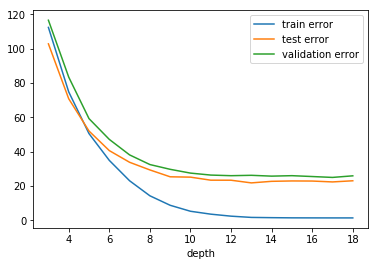

In [358]:
plt.plot(depths, train_errors)
plt.plot(depths, test_errors)
plt.plot(depths, val_scores)

plt.legend(['train error', 'test error', 'validation error'])
plt.xlabel('depth')

(array([ 59.,  35.,  73.,  74., 217., 142.,  80.,  74.,  14.,   4.]),
 array([594.  , 633.86, 673.72, 713.58, 753.44, 793.3 , 833.16, 873.02,
        912.88, 952.74, 992.6 ]),
 <a list of 10 Patch objects>)

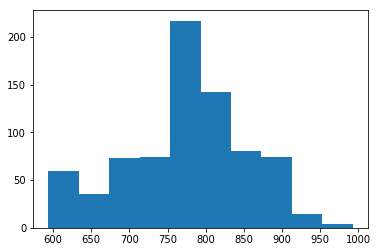

In [376]:
plt.hist(X_train['fine_aggregate '])

(array([20., 17., 23., 34., 60., 49., 32., 19.,  3.,  1.]),
 array([594.  , 633.86, 673.72, 713.58, 753.44, 793.3 , 833.16, 873.02,
        912.88, 952.74, 992.6 ]),
 <a list of 10 Patch objects>)

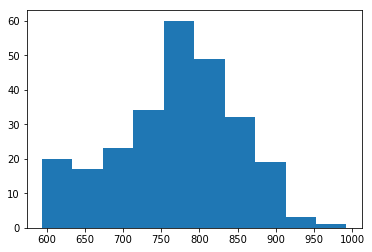

In [377]:
plt.hist(X_test['fine_aggregate '])

## Task 7. Multi-Label Classification Strategies (2 points)
In this task you deal with multiclass classification problem for [Glass Classification Data](https://www.kaggle.com/uciml/glass). Lets load the dataset.

In [378]:
data = pd.read_csv('data/glass.csv')
X, y = data.drop('Type', axis=1), data.Type
data.sample(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.0,6
82,1.51646,13.41,3.55,1.25,72.81,0.68,8.10,0.0,0.0,2
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.0,0.0,2


The features of each glass oject correspond to the fraction of the particular chemical element in the object. The target variable corresponds to the type of glass (6 classes).

In this problem you have to empirically compare the time complexity and performance of several multiclass labeling strategies for different algorithms. You must consider the following algorithms:
* Single Decision Tree (depth 7)
* Medium Random Forest (100 trees of depth 3)
* KNearestNeighbors (5 neighbors)
* Logistic Regression

Note that all these algorithms by default support **multiclass labeling**. Nevertheless, we want you to compare this approach with **OneVSRest** and **OneVSOne** approaches applied to this algorithms. More precisely, for every pair (algorithm, approach) you are to perform 5-fold cross validation on the data and output the validation score and the computation time in the **table** form. Please note that you also have to choose the metric to optimize during CV (e.g. accuracy, balanced accuracy) on your own. 

After that, you are to answer the following questions:
* Which metric did you choose to optimize during cross validation and why? Explain
* For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without significant increase in computation time?

In [432]:
### BEGIN Solution
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
import pandas as pd
import time

empty = pd.DataFrame(columns=['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier'], index=['Multiclass', 'OneVsRest', 'OneVsOne'], dtype=np.float32)
empty = empty.fillna(0.0)


y_vals = np.unique(data.Type)

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

dtc = DecisionTreeClassifier(max_depth=7, random_state=42)
rfc = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1e4, random_state=42)

classifiers = [dtc, rfc, knn, lr]
scoring = 'f1_micro'
scores = empty.copy()
times = empty.copy()

for clf in classifiers:
    start = time.time()
    scores.loc['Multiclass'][clf.__str__().split('(', 1)[0]] = np.mean(cross_val_score(X=X, 
                                                                        y=y,
                                                                        estimator=clf, 
                                                                        cv=cv, 
                                                                        scoring=scoring))
    end = time.time()
    times.loc['Multiclass'][clf.__str__().split('(', 1)[0]] = end - start
    
    start = time.time()
    scores.loc['OneVsRest'][clf.__str__().split('(', 1)[0]] = np.mean(cross_val_score(X=X, 
                                                                    y=y,
                                                                    estimator=OneVsRestClassifier(clf), 
                                                                    cv=cv, 
                                                                    scoring=scoring))
    end = time.time()
    times.loc['OneVsRest'][clf.__str__().split('(', 1)[0]] = end - start
    
    start = time.time()
    scores.loc['OneVsOne'][clf.__str__().split('(', 1)[0]] = np.mean(cross_val_score(X=X, 
                                                                y=y,
                                                                estimator=OneVsOneClassifier(clf), 
                                                                cv=cv, 
                                                                scoring=scoring))
    end = time.time()
    times.loc['OneVsOne'][clf.__str__().split('(', 1)[0]] = end - start
 

print("Cross Validation Scores")
display(scores)

print("Training duration (CV=5)")
display(times)
### END Solution

Cross Validation Scores


,LogisticRegression,RandomForestClassifier,KNeighborsClassifier,DecisionTreeClassifier
Multiclass,0.617310,0.687207,0.654740,0.659379
OneVsRest,0.613352,0.720028,0.682835,0.631399
OneVsOne,0.599340,0.747733,0.640760,0.733948


Training duration (CV=5)


,LogisticRegression,RandomForestClassifier,KNeighborsClassifier,DecisionTreeClassifier
Multiclass,2.791427,0.445241,0.021896,0.043378
OneVsRest,1.091133,3.110902,0.083716,0.099250
OneVsOne,4.928197,6.817122,0.384064,0.216383


>Which metric did you choose to optimize during cross validation and why? Explain

I decided to choose f1 micro score hence it takes into account class imbalance 
and aggregates the contributions of all classes to compute the average metric.
So I think it's more representative in this situation

>For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without significant increase in computation time?

As I can see for DecisionTreeClassifier